In [1]:
pip install pandas numpy matplotlib seaborn jupyter


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.8 MB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 12.7 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 70.1 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 6.3 MB/s eta 0:00:01
     |██████████████████████

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/anuragpatel/Desktop/Data Analytics/netflix_titles.csv")

In [5]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Handle missing values (e.g., fill or drop)

In [7]:
df['country'].fillna('Unknown', inplace=True)
df.dropna(subset=['rating', 'duration'], inplace=True)

/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/124844879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


                                      EXPLORATORY  DATA ANALYSIS (EDA)

1. Movies vs. TV Shows Distribution

/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/2164066752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


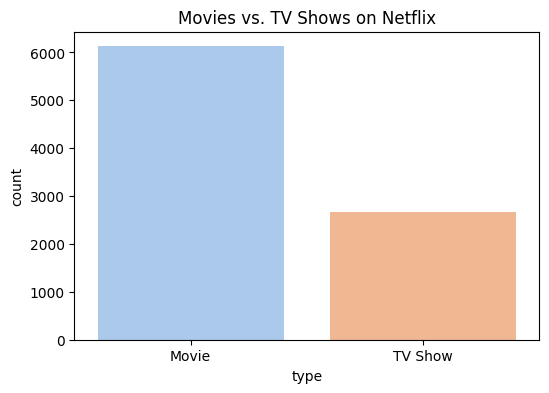

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Movies vs. TV Shows on Netflix')
plt.show()

2. Top 10 Countries Producing Content

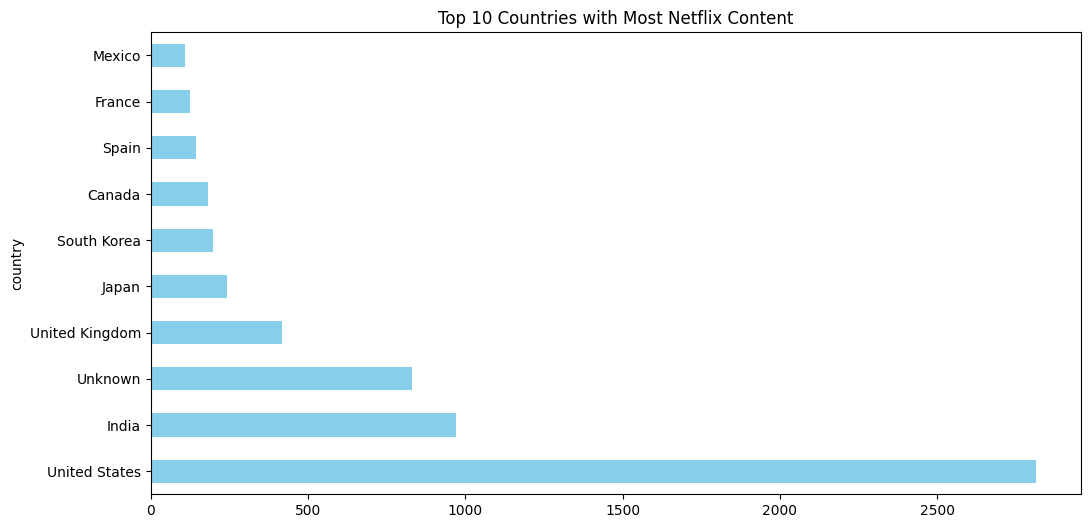

In [11]:
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries with Most Netflix Content')
plt.show()

3. Ratings Distribution

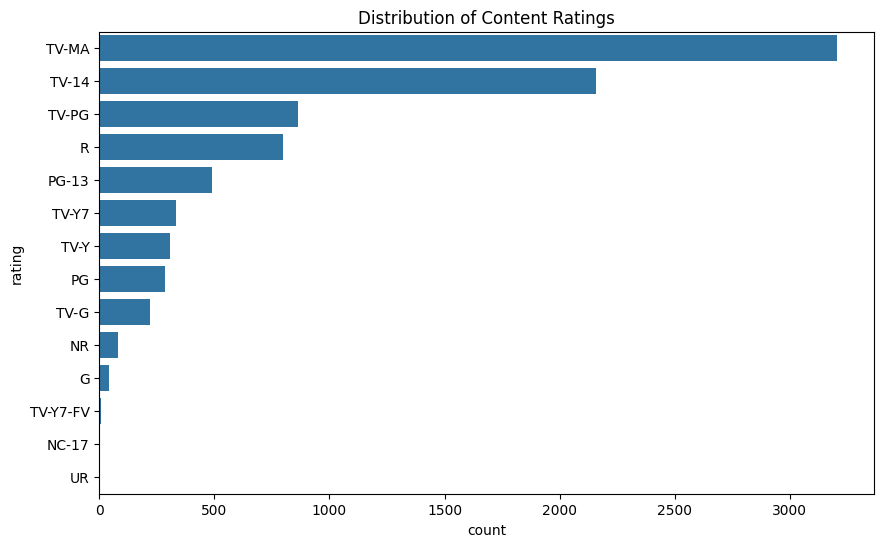

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.show()

In [ ]:
5. Most Common Genres

/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/4232519372.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for genre, count in genre_counts],


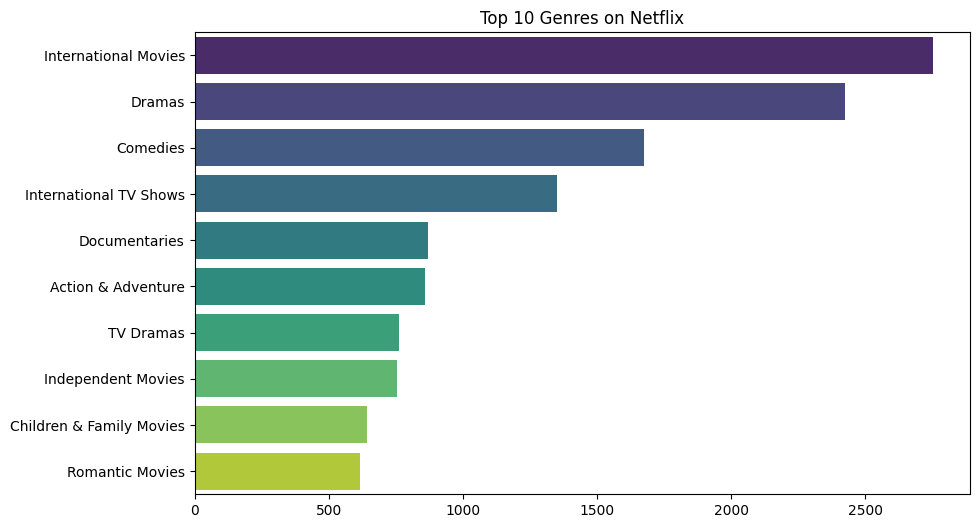

In [13]:
from collections import Counter

genres = list(df['listed_in'].str.split(', ').explode())
genre_counts = Counter(genres).most_common(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for genre, count in genre_counts], 
            y=[genre for genre, count in genre_counts], 
            palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()

6.Duration Trends

/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/615359083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/615359083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].str.replace(' Seasons?', '', regex=True).astype(int)


Text(0.5, 1.0, 'Number of Seasons per TV Show')

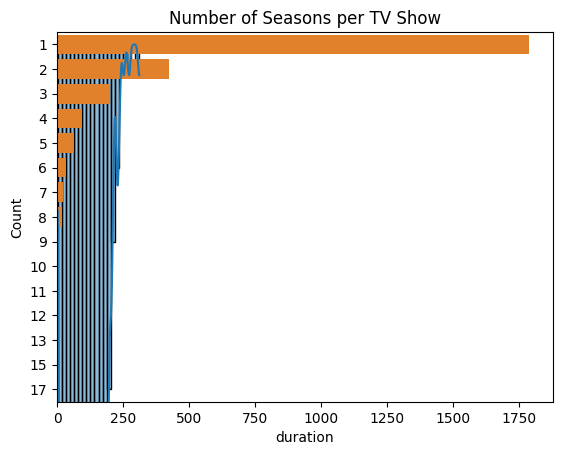

In [14]:
# For Movies
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
sns.histplot(movies['duration'], bins=20, kde=True)
plt.title('Distribution of Movie Durations (Minutes)')

# For TV Shows
tv_shows = df[df['type'] == 'TV Show']
tv_shows['duration'] = tv_shows['duration'].str.replace(' Seasons?', '', regex=True).astype(int)
sns.countplot(y='duration', data=tv_shows)
plt.title('Number of Seasons per TV Show')

In [15]:
plt.savefig('netflix_genres.png')

<Figure size 640x480 with 0 Axes>

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year


7. Content Added Over Time

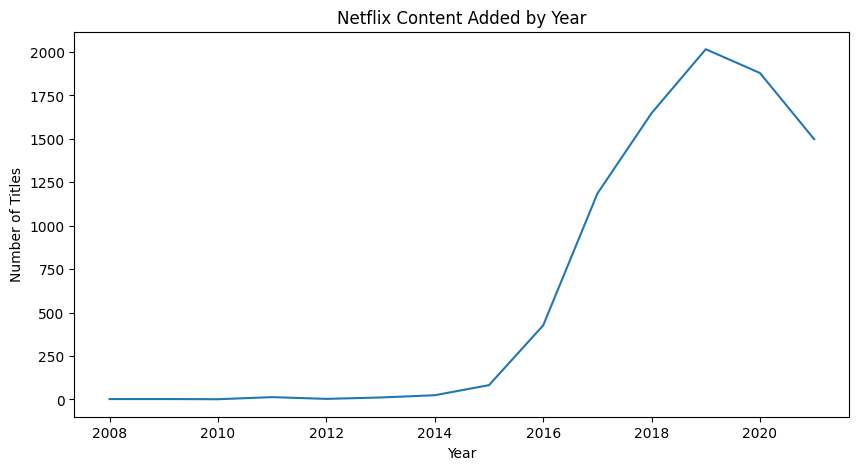

In [21]:
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Netflix Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

/var/folders/80/_pd1hc_x3cz8x4gm9q1d2knw0000gn/T/ipykernel_2455/961501208.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_additions = df.resample('M', on='date_added').size()


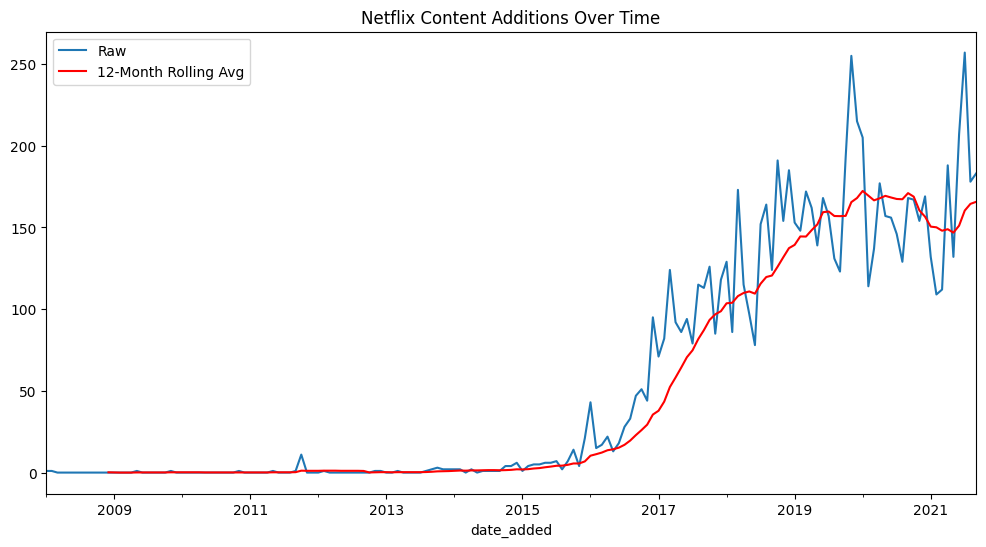

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'])
monthly_additions = df.resample('M', on='date_added').size()

# Plot with rolling average
plt.figure(figsize=(12, 6))
monthly_additions.plot(label='Raw')
monthly_additions.rolling(12).mean().plot(label='12-Month Rolling Avg', color='red')
plt.title('Netflix Content Additions Over Time')
plt.legend()